In [2]:
import pandas as pd
import re
import nltk
import warnings
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline    
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [6]:
df = pd.read_csv('LIAR_for_modeling.csv')
df.head()

,text,fake
0,Says the Annies List political group supports ...,1
1,"Hillary Clinton agrees with John McCain ""by vo...",0
2,Health care reform legislation is likely to ma...,1
3,The Chicago Bears have had more starting quart...,0
4,Jim Dunnam has not lived in the district he re...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10164 non-null  object
 1   fake    10164 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 158.9+ KB


<Axes: xlabel='fake', ylabel='count'>

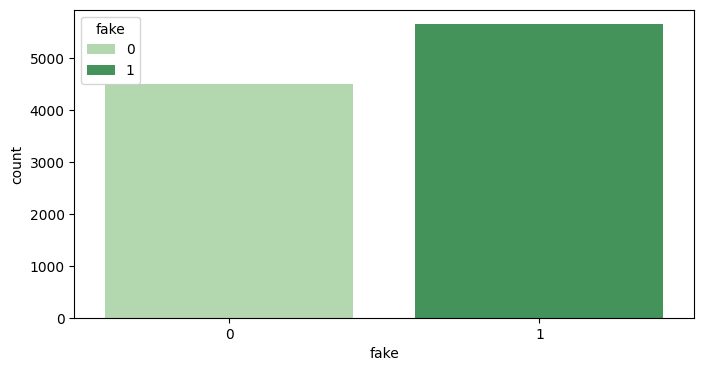

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='fake', palette='Greens',hue='fake')

In [10]:
def data_cleaning(text):
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = str.lower(text) 
    text = text.split()    
    text = ' '.join(text)  
    return text


df['Clean Text'] = df['text'].apply(data_cleaning)

In [11]:
nltk.download('punkt_tab')

df['Tokenized Text'] = df['Clean Text'].apply(lambda document: nltk.word_tokenize(document))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\local\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
#z biblioteki nltk pobieramy stopwords
nltk.download('stopwords')

def stopwords_removal(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text

df['Filtered Text'] = df['Tokenized Text'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\local\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatizing(tokens):
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return lemmas

df['Lemmatized Text'] = df['Filtered Text'].apply(lemmatizing)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\local\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df.head()

,text,fake,Clean Text,Tokenized Text,Filtered Text,Lemmatized Text
0,Says the Annies List political group supports ...,1,says the annies list political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, annies, list, political, group, support,..."
1,"Hillary Clinton agrees with John McCain ""by vo...",0,hillary clinton agrees with john mccain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillary, clinton, agree, john, mccain, vote, ..."
2,Health care reform legislation is likely to ma...,1,health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legislation, likely, ma..."
3,The Chicago Bears have had more starting quart...,0,the chicago bears have had more starting quart...,"[the, chicago, bears, have, had, more, startin...","[chicago, bears, starting, quarterbacks, last,...","[chicago, bear, start, quarterback, last, year..."
4,Jim Dunnam has not lived in the district he re...,1,jim dunnam has not lived in the district he re...,"[jim, dunnam, has, not, lived, in, the, distri...","[jim, dunnam, lived, district, represents, years]","[jim, dunnam, live, district, represent, years]"


In [15]:
corpus = []
for tokens in df['Lemmatized Text']:
    document = ' '.join([word for word in tokens])
    corpus.append(document)
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus)

y = df['fake']

In [16]:
len(corpus)

10164

In [17]:
X

<10164x9337 sparse matrix of type '<class 'numpy.float64'>'
	with 101840 stored elements in Compressed Sparse Row format>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

logit_model.fit(X_train, y_train)


LogisticRegression()

0.6330545991146089
0.648689138576779
[[421 469]
 [277 866]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       890
           1       0.65      0.76      0.70      1143

    accuracy                           0.63      2033
   macro avg       0.63      0.62      0.61      2033
weighted avg       0.63      0.63      0.63      2033



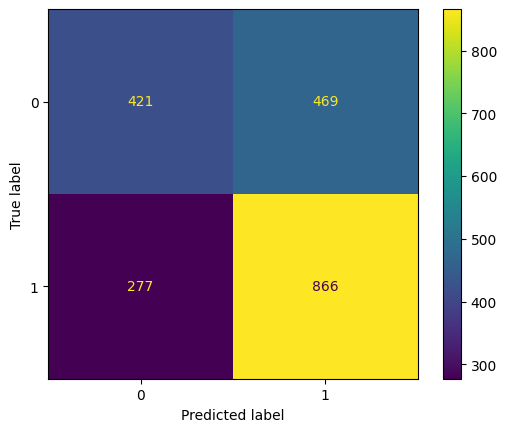

In [20]:
y_pred = logit_model.predict(X_test)
y_proba = logit_model.predict_proba(X_test)

y_proba_one = y_proba[:,1]


from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)

print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test,y_pred))



cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Naive Bayes classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

MultinomialNB()

0.6355140186915887
0.6419491525423728
[[383 507]
 [234 909]]
              precision    recall  f1-score   support

           0       0.62      0.43      0.51       890
           1       0.64      0.80      0.71      1143

    accuracy                           0.64      2033
   macro avg       0.63      0.61      0.61      2033
weighted avg       0.63      0.64      0.62      2033



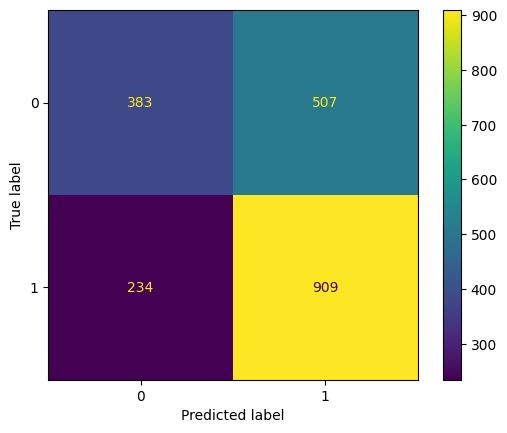

In [22]:
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)

y_proba_one = y_proba[:,1]


from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)

print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test,y_pred))



cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()